# Star dataset has been used.
# Aim is to predict the star type.

Importing packages:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import io

Uploading the dataset:

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving StarData.csv to StarData (1).csv


Reading dataset:

In [ ]:
dataset = pd.read_csv('StarData.csv')
print(dataset)

     Temperature (K)  Luminosity(L/Lo)  ...  Spectral Class  Star type
0               3068          0.002400  ...               M          0
1               3042          0.000500  ...               M          0
2               2600          0.000300  ...               M          0
3               2800          0.000200  ...               M          0
4               1939          0.000138  ...               M          0
..               ...               ...  ...             ...        ...
235            38940     374830.000000  ...               O          5
236            30839     834042.000000  ...               O          5
237             8829     537493.000000  ...               A          5
238             9235     404940.000000  ...               A          5
239            37882     294903.000000  ...               O          5

[240 rows x 7 columns]


Dataset overview:

In [ ]:
dataset.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star color,Spectral Class,Star type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star color              240 non-null    object 
 5   Spectral Class          240 non-null    object 
 6   Star type               240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


# Preprocessing - preparing dataset for training and testing: 


In [ ]:
dataset.isnull().any()

Temperature (K)           False
Luminosity(L/Lo)          False
Radius(R/Ro)              False
Absolute magnitude(Mv)    False
Star color                False
Spectral Class            False
Star type                 False
dtype: bool

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
dataset["Star color"] = le.fit_transform(dataset["Star color"])

In [ ]:
dataset.head(100)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star color,Spectral Class,Star type
0,3068,0.002400,0.1700,16.12,10,M,0
1,3042,0.000500,0.1542,16.60,10,M,0
2,2600,0.000300,0.1020,18.70,10,M,0
3,2800,0.000200,0.1600,16.65,10,M,0
4,1939,0.000138,0.1030,20.06,10,M,0
...,...,...,...,...,...,...,...
95,11250,672.000000,6.9800,-2.30,6,A,3
96,5112,0.630000,0.8760,4.68,8,K,3
97,7720,7.920000,1.3400,2.44,17,F,3
98,12098,689.000000,7.0100,0.02,6,A,3


In [ ]:
dataset["Spectral Class"] = le.fit_transform(dataset["Spectral Class"])

In [ ]:
dataset.head(100)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star color,Spectral Class,Star type
0,3068,0.002400,0.1700,16.12,10,5,0
1,3042,0.000500,0.1542,16.60,10,5,0
2,2600,0.000300,0.1020,18.70,10,5,0
3,2800,0.000200,0.1600,16.65,10,5,0
4,1939,0.000138,0.1030,20.06,10,5,0
...,...,...,...,...,...,...,...
95,11250,672.000000,6.9800,-2.30,6,0,3
96,5112,0.630000,0.8760,4.68,8,4,3
97,7720,7.920000,1.3400,2.44,17,2,3
98,12098,689.000000,7.0100,0.02,6,0,3


# Implementing K-NN: 

Feature selection: 

In [ ]:
x = dataset.iloc[:, 0: 6].values
y = dataset.iloc[:, -1].values

Splitting dataset:

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20)

In [ ]:
print(x_train)

[[ 3.3240e+03  3.4000e-03  3.4000e-01  1.2230e+01  1.0000e+01  5.0000e+00]
 [ 1.8000e+04  2.0000e+05  1.0450e+03 -8.3000e+00  0.0000e+00  6.0000e+00]
 [ 3.0950e+03  1.9000e-04  4.9200e-01  1.0870e+01  1.0000e+01  5.0000e+00]
 ...
 [ 1.4060e+04  1.0920e+03  5.7450e+00 -2.0400e+00  6.0000e+00  0.0000e+00]
 [ 1.2984e+04  8.8000e-04  9.9600e-03  1.1230e+01  2.0000e+00  1.0000e+00]
 [ 3.0000e+04  2.8840e+04  6.3000e+00 -4.2000e+00  6.0000e+00  1.0000e+00]]


Scaling data:

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

Applying K-NN:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
y_pred = classifier.predict(x_test)

Classification report of K-NN:

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      1.00      0.95         9
           2       0.83      1.00      0.91         5
           3       0.88      0.78      0.82         9
           4       1.00      0.86      0.92         7
           5       1.00      1.00      1.00         7

    accuracy                           0.94        48
   macro avg       0.93      0.94      0.93        48
weighted avg       0.94      0.94      0.94        48



Confusion matrix for K-NN:

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[11  0  0  0  0  0]
 [ 0  9  0  0  0  0]
 [ 0  0  5  0  0  0]
 [ 0  1  1  7  0  0]
 [ 0  0  0  1  6  0]
 [ 0  0  0  0  0  7]]


Accuracy achived with K-NN:

In [ ]:
print(accuracy_score(y_test, y_pred))

0.9375


In [ ]:
accuracy_knn = accuracy_score(y_test, y_pred)

# Implementing Decision Tree:

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Importing Decision Tree Classifier
from sklearn.model_selection import train_test_split # Importing train_test_split function
from sklearn import metrics #Importing scikit-learn metrics module for accuracy calculation

Preprocessing is already performed.

In [ ]:
dataset2 = dataset
dataset2.head(8)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star color,Spectral Class,Star type
0,3068,0.002400,0.1700,16.12,10,5,0
1,3042,0.000500,0.1542,16.60,10,5,0
2,2600,0.000300,0.1020,18.70,10,5,0
3,2800,0.000200,0.1600,16.65,10,5,0
4,1939,0.000138,0.1030,20.06,10,5,0
5,2840,0.000650,0.1100,16.98,10,5,0
6,2637,0.000730,0.1270,17.22,10,5,0
7,2600,0.000400,0.0960,17.40,10,5,0


Renaming the columns:

In [ ]:
dataset2 = dataset.rename(columns = {'Temperature (K)': 'temp', 'Luminosity(L/Lo)': 'lumi', 'Radius(R/Ro)' : 'rad', 'Absolute magnitude(Mv)' : 'abm',
                                      'Star color' : 'color', 'Spectral Class' : 'class', 'Star type' : 'type'}, inplace = False)

In [ ]:
dataset2

,temp,lumi,rad,abm,color,class,type
0,3068,0.002400,0.1700,16.12,10,5,0
1,3042,0.000500,0.1542,16.60,10,5,0
2,2600,0.000300,0.1020,18.70,10,5,0
3,2800,0.000200,0.1600,16.65,10,5,0
4,1939,0.000138,0.1030,20.06,10,5,0
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,0,6,5
236,30839,834042.000000,1194.0000,-10.63,0,6,5
237,8829,537493.000000,1423.0000,-10.73,11,0,5
238,9235,404940.000000,1112.0000,-11.23,11,0,5


Feature selection:

In [ ]:
feature_cols = ['temp', 'lumi', 'rad', 'abm', 'color', 'class']
x = dataset2[feature_cols]
y = dataset2.type

Function for calculating the entropy of the column:

In [ ]:
def entropy(col):
    counts = np.unique(col,return_counts=True)
    ent = 0.0
    for ix in counts[1]:
        p = ix/col.shape[0]
        ent += (-1.0*p*np.log2(p))
    return ent

Function for dividing the data:

In [ ]:
def divide_data(x_data,fkey,fval):
    x_right = pd.DataFrame([],columns=x_data.columns)
    x_left = pd.DataFrame([],columns=x_data.columns)
    for ix in range(x_data.shape[0]):
        val = x_data[fkey].loc[ix]
        if val >=fval:
            x_right = x_right.append(x_data.iloc[ix])
        else:
            x_left = x_left.append(x_data.iloc[ix])
    return x_right,x_left

Function for calculating the information gain:

In [ ]:
def information_gain(x_data,fkey,fval):
    right,left = divide_data(x_data,fkey,fval)
    
    l = float(left.shape[0])/x_data.shape[0]
    r = float(right.shape[0])/x_data.shape[0]
    if left.shape[0] == 0 or right.shape[0] == 0:
        return -99999
    i_gain = entropy(x_data.type) - (l * entropy(left.type) + r*entropy(right.type))
    return i_gain

Decision Tree class:

In [ ]:
class DecisionTree:
    def __init__(self,depth=0,max_depth=5):
        self.left = None
        self.right = None
        self.fkey = None
        self.fval = None
        self.depth = depth
        self.max_depth = max_depth
        self.target = None
    def train(self,x_train):
        features = ['temp', 'lumi', 'rad', 'abm', 'color', 'class']
        info_gains = []
        for ix in features:
            i_gain = information_gain(x_train,ix,x_train[ix].mean())
            info_gains.append(i_gain)
        self.fkey = features[np.argmax(info_gains)]
        self.fval = x_train[self.fkey].mean()
        print("Splitting Tree",self.fkey)
        data_right,data_left = divide_data(x_train,self.fkey,self.fval)
        data_right = data_right.reset_index(drop=True)
        data_left = data_left.reset_index(drop=True)
        if data_left.shape[0] == 0 or data_right.shape[0] == 0:
            if x_train.type.mean() >= 0.5:
                self.target = "Positive"
            else:
                self.target = "Negative"
            return
        if self.depth >= self.max_depth:
            if x_train.type.mean() >= 0.5:
                self.target = "Positive"
            else:
                self.target = "Negative"
            return
        self.left = DecisionTree(self.depth+1,self.max_depth)
        self.left.train(data_left)
        self.right = DecisionTree(self.depth+1,self.max_depth)
        self.right.train(data_right)
        if x_train.type.mean() >= 0.5:
            self.target = "Positive"
        else:
            self.target = "Negative"
        return
    def predict(self,test):
        if test[self.fkey] > self.fval:
            if self.right is None:
                return self.target
            return self.right.predict(test)
        if test[self.fkey] < self.fval:
            if self.left is None:
                return self.target
            return self.left.predict(test)

Spliting the dataset into training data and testing data.

In [ ]:
split = int(0.7*dataset2.shape[0])
train_data = dataset2[:split]
test_data = dataset2[split:]
test_data= test_data.reset_index(drop=True)

Object of DecisionTree Class

In [ ]:
dt = DecisionTree()

Training data:

In [ ]:
dt.train(train_data)

Splitting Tree abm
Splitting Tree abm
Splitting Tree rad
Splitting Tree temp
Splitting Tree temp
Splitting Tree temp
Splitting Tree temp
Splitting Tree temp
Splitting Tree temp
Splitting Tree temp
Splitting Tree temp
Splitting Tree temp
Splitting Tree temp
Splitting Tree temp
Splitting Tree temp
Splitting Tree temp
Splitting Tree temp
Splitting Tree rad
Splitting Tree temp
Splitting Tree temp
Splitting Tree temp
Splitting Tree temp
Splitting Tree temp
Splitting Tree temp
Splitting Tree temp
Splitting Tree temp
Splitting Tree temp
Splitting Tree temp
Splitting Tree temp
Splitting Tree temp
Splitting Tree temp
Splitting Tree abm
Splitting Tree color
Splitting Tree temp
Splitting Tree temp
Splitting Tree temp
Splitting Tree temp
Splitting Tree temp
Splitting Tree temp
Splitting Tree rad
Splitting Tree temp
Splitting Tree temp
Splitting Tree temp
Splitting Tree lumi
Splitting Tree temp
Splitting Tree abm
Splitting Tree temp
Splitting Tree temp
Splitting Tree temp
Splitting Tree temp
Splitt

In [ ]:
y_pred = []
for ix in range(test_data.shape[0]):
    y_pred.append(dt.predict(test_data.loc[ix]))

In [ ]:
y_pred[:10]

['Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive',
 'Positive']

In [ ]:
for i in range(len(y_pred)):
    if y_pred[i] == "Negative":
        y_pred[i] = 0
    else:
        y_pred[i] = 1

In [ ]:
np.mean(y_pred == test_data['type'])

0.2638888888888889

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
features = ['temp', 'lumi', 'rad', 'abm', 'color', 'class']

In [ ]:
sk_tree = DecisionTreeClassifier()

In [ ]:
sk_tree.fit(train_data[features],train_data["type"])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
sk_tree.predict(test_data[features])

array([4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5])

In [ ]:
sk_tree.score(test_data[features],test_data["type"])

1.0

Splitting dataset into training set and testing set:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) # 80% training and 20% testing

Creating Decision Tree classifer object:

In [ ]:
clf = DecisionTreeClassifier()

Training Decision Tree Classifer:

In [ ]:
clf = clf.fit(X_train,y_train)

Predicting the response for test dataset:

In [ ]:
y_pred = clf.predict(X_test)

Classification report for Decision Tree:

In [ ]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00        13
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00        10

    accuracy                           1.00        48
   macro avg       1.00      1.00      1.00        48
weighted avg       1.00      1.00      1.00        48



Confusion matrix for Decision Tree:

In [ ]:
print(metrics.confusion_matrix(y_test, y_pred))

[[ 6  0  0  0  0  0]
 [ 0  5  0  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  0  0 13  0  0]
 [ 0  0  0  0  6  0]
 [ 0  0  0  0  0 10]]


Accuracy with Decision Tree:

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


In [ ]:
accuacy_dt = metrics.accuracy_score(y_test, y_pred)

# Naive Bayes Classifier:

In [ ]:
from sklearn.naive_bayes import GaussianNB

Preprocessing is already performed:

In [ ]:
dataset3 = dataset2
dataset3.head(6)

,temp,lumi,rad,abm,color,class,type
0,3068,0.002400,0.1700,16.12,10,5,0
1,3042,0.000500,0.1542,16.60,10,5,0
2,2600,0.000300,0.1020,18.70,10,5,0
3,2800,0.000200,0.1600,16.65,10,5,0
4,1939,0.000138,0.1030,20.06,10,5,0
5,2840,0.000650,0.1100,16.98,10,5,0


Feature selection:

In [ ]:
predictors = dataset3.drop('type', axis = 'columns')
target = dataset3.type

In [ ]:
predictors.abm = predictors.abm.fillna(predictors.abm.mean())
predictors.head()

,temp,lumi,rad,abm,color,class
0,3068,0.002400,0.1700,16.12,10,5
1,3042,0.000500,0.1542,16.60,10,5
2,2600,0.000300,0.1020,18.70,10,5
3,2800,0.000200,0.1600,16.65,10,5
4,1939,0.000138,0.1030,20.06,10,5


Dividing dataset in training set and testing set:

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(predictors,target,test_size=0.25)

Applying Naive Bayes classifier:

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)
model.score(X_test,y_test) #the gauge the accuracy

0.8833333333333333

In [ ]:
GausNB = GaussianNB()
GausNB.fit(X_train, y_train)
print(GausNB)

y_pred = GausNB.predict(X_test)

GaussianNB(priors=None, var_smoothing=1e-09)


Classification report for Naive Bayes classifier:

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.56      0.67         9
           1       0.60      0.86      0.71         7
           2       0.80      1.00      0.89         8
           3       1.00      0.78      0.88         9
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00        16

    accuracy                           0.88        60
   macro avg       0.87      0.87      0.86        60
weighted avg       0.90      0.88      0.88        60



Confusion matrix for Naive Bayes Classifier:

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[ 5  3  1  0  0  0]
 [ 1  6  0  0  0  0]
 [ 0  0  8  0  0  0]
 [ 0  1  1  7  0  0]
 [ 0  0  0  0 11  0]
 [ 0  0  0  0  0 16]]


Accuracy with Naive Bayes Classifier:

In [ ]:
print(accuracy_score(y_test, y_pred))

0.8833333333333333


In [ ]:
accuracy_NB = accuracy_score(y_test, y_pred)

# Accuracy comparison of K-NN, Decision Tree and Naive Bayes Classifier:

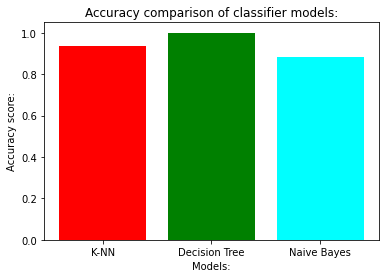

In [ ]:
height = [accuracy_knn, accuacy_dt, accuracy_NB]
bars = ('K-NN', 'Decision Tree', 'Naive Bayes',)
x_pos = np.arange(len(bars))
plt.bar(x_pos, height, color=['red', 'green', 'cyan'])
plt.title('Accuracy comparison of classifier models:')
plt.xlabel('Models:')
plt.ylabel('Accuracy score:')
plt.xticks(x_pos, bars)
plt.show()